# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/suneman/socialgraphs2025/main/files/rock.png "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[Rock Bands & Performers](https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers)**. 

To create the network, we will download the Wikipedia pages for all people in the list. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [The Beatles](https://en.wikipedia.org/wiki/The_Beatles) links to [the Kinks](https://en.wikipedia.org/wiki/The_Kinks), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions.
* Download and store (for later use) all the performer-pages from Wikipedia.
* Extract all the internal wikipedia-links that connect the performers on Wikipedia.
* Generate the network of performers on wikipedia.
* Calculate some simple network statistics.
* Create a simple plot

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.

<div class="alert alert-block alert-info">
The recipe below is what I told the class to do before LLMs. If you want to try to learn about regular expressions on your own, that's what you need to do. <b>BUT!</b> You don't have to. <b>For this part, it's OK to use an LLM to help you as much as you possibly can.</b> The reason I'm saying this is that I don't think having an intimate knowledge of regular expressions is important for the content of this class.
</div>
<div class="alert alert-block alert-info">
That said, <b>using an LLM means that you have to do extra checking and testing</b>. Make sure that the code you get from your LLM actually does what you asked it to do by going through some examples and manually checking (use a real wiki page or the test-text below). If your LLM hallucinated the wrong answer and you still use the data that comes out, it will count negatively in our evaluations.
</div>

> *Reading/Video*
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)

> _Exercises_: Regular expressions round 1\.
> * Now, explain in your own words: what are regular expressions?
>   * Regular experssions are a way to search in a string of text according to specific rules that you can define.
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Now we can go on to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/John_McCain). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [1]:
import re

In [2]:
# Exercise regular expressions round 1
regex_4_digits = r'\b\d{4}\b'
regex_super_words = r'\bsuper\w*'
text = """Tousled try-hard blog Carles, typewriter fap hella salvia fanny pack selvage mlkshk crucifix. Next level retro quinoa post-ironic. Heirloom keffiyeh synth street art meggings, drinking vinegar Schlitz actually raw denim. 1234 Normcore freegan post-ironic meggings cred, cardigan yr locavore 3 wolf moon. Bitters ennui ugh superpolaroid, artisan scenester distillery kale chips wolf pork belly keffiyeh. Actually Tumblr twee [[drinking vinegar]], squid pickled cronut banh mi taxidermy deep v 8-bit narwhal Odd Future. Sriracha bicycle rights listicle, keffiyeh typewriter authentic selvage cred selfies.
Ugh lo-fi tattooed chambray, DIY Marfa banh mi whatever narwhal jean shorts photo booth keytar listicle. Chambray Truffaut cardigan skateboard, hashtag disrupt next level. Normcore Blue Bottle yr, Odd Future skateboard chillwave iPhone slow-carb sriracha letterpress meditation cronut. IPhone fashion axe Neutra fingerstache tofu gluten-free [[gentrify]], wolf before they sold out pork belly retro Vice skateboard DIY Marfa. Mustache supertaxidermy cliche 9999 fashion axe Pitchfork, iPhone cred literally McSweeney's normcore. Health goth meggings skateboard 90's 3 wolf moon, PBR&B kale chips biodiesel fashion axe. Sartorial crucifix retro, four dollar toast kogi forage swag deep v wayfarers tilde.
Synth typewriter messenger bag health goth scenester pour-over. Pour-over Truffaut 90's fashion axe post-ironic, Portland Wes Anderson forage occupy sartorial gentrify hashtag beard kitsch quinoa. Occupy [[hashtag]] street art 3 wolf moon, Echo Park quinoa Tumblr Pitchfork fanny pack High Life. Helvetica banjo gentrify authentic mumblecore, tote bag blog. Scenester +1 American Apparel organic literally, Intelligentsia butcher bitters. Seitan lumbersexual fanny pack organic, letterpress umami ethical wayfarers. Cronut biodiesel Wes Anderson, jean shorts lo-fi keffiyeh Carles.
Bushwick health goth chambray gluten-free distillery. Keytar selvage Shoreditch, seitan YOLO tote bag listicle Marfa farm-to-table keffiyeh meditation tilde. Narwhal freegan meditation, Pitchfork XOXO Brooklyn 23456 whatever photo booth pork belly Blue Bottle gluten-free. Semiotics fashion axe 3 wolf moon, selfies brunch skateboard shabby chic organic wayfarers yr whatever kitsch Thundercats tilde bespoke. [[Bicycle|Bicycle(two-wheeled type)]] rights seitan mlkshk Marfa, church-key cray mustache sartorial banh mi food truck chillwave Echo Park bitters. Craft superbeer bespoke street art, slow-carb pop-up Kickstarter typewriter Etsy try-hard [[Pitchfork|Pitchfork Magazine]] aesthetic keytar Tumblr. 8-bit bitters fanny pack, Portland Odd Future yr selvage crucifix narwhal polaroid sriracha Thundercats."""
print(re.findall(regex_4_digits, text))
print(re.findall(regex_super_words, text))

['1234', '9999']
['superpolaroid', 'supertaxidermy', 'superbeer']


In [3]:
# Exercise regular expressions round 2
regex_wiki_links = r'\[\[([^\[\]|]+)(?:\|[^\[\]]+)?\]\]'
print(re.findall(regex_wiki_links, text))

['drinking vinegar', 'gentrify', 'hashtag', 'Bicycle', 'Pitchfork']


---

# Part 1: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

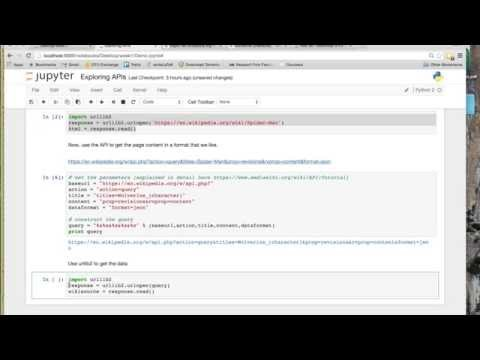

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, it's time to go and get the names of all the wiki pages you'll need for your analysis. Those will serve as the nodes in our network. 

*Exercise*
> * Go to the page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers and extract all of the artist-links using your regular expressions from above.
>   * Hint: To make this easier, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names. (Otherwise there are some wiki-links there that you don't want)

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM as much as you can here. But you should double check that it actually does what you want and all that stuff.
</div>

#### A note to the perfectionists out there
The files contain names and corresponding wiki-link, but pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects).

#### Back to our regularly scheduled programming

With the list from the exercise above, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the country performers. 
>   - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your **download the cleanest possible version of the page (the wikitext)**. [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>   - Hint 1: You may want to save the individual band/artist pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per band/artist, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>   - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
>   - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

In [ ]:
import requests
import os
import pickle

# Define API endpoint and parameters to get the wikitext of the list page
API_URL = "https://en.wikipedia.org/w/api.php"
headers = {'User-Agent': 'Mozilla/5.0 (Jupyter Notebook) Educational project/1.0'}

list_page_params = {
    "action": "query",
    "prop": "revisions",
    "rvprop": "content",
    "titles": "List_of_mainstream_rock_performers",
    "format": "json",
    "formatversion": 2
}

# Make the request to get the list page content
response = requests.get(API_URL, params=list_page_params, headers=headers)
response.raise_for_status()
list_data = response.json()

# Extract the wikitext from the JSON response
wikitext = list_data["query"]["pages"][0]["revisions"][0]["content"]

# Exclude the reference section and the short description at the top
wikitext = wikitext.split("==0-9==")[1]
wikitext = wikitext.split("==References==")[0]
performer_links = re.findall(regex_wiki_links, wikitext, re.MULTILINE)
print(f"Found {len(performer_links)} performer links")

# Create a directory to save the pages, if it doesn't exist
output_dir = "rock_performers_pages"
os.makedirs(output_dir, exist_ok=True)
print(f"\nSaving pages to '{output_dir}/' directory as pickle files...")

for performer in performer_links:
    safe_filename = re.sub(r'[\\/*?:"<>|]', "_", performer)
    filepath = os.path.join(output_dir, f"{safe_filename}.pkl")

    if os.path.exists(filepath):
        continue

    print(f"Downloading page for: {performer}")
    
    page_params = {
        "action": "query",
        "prop": "revisions",
        "rvprop": "content",
        "titles": performer,
        "format": "json",
        "formatversion": 2,
        "redirects": 1 # Follow redirects automatically
    }

    try:
        response = requests.get(API_URL, params=page_params, headers=headers)
        response.raise_for_status()
        page_data = response.json()
        
        page_content = page_data["query"]["pages"][0].get("revisions", [{}])[0].get("content", "")

        if page_content:
            with open(filepath, 'wb') as f:
                pickle.dump(page_content, f)
        else:
            print(f"  -> No content found for {performer}")

    except Exception as e:
        print(f"  -> Failed to download {performer}: {e}")

print("\nDownload complete.")

Found 489 performer links


---

# Part 2: Building the networks

Now, we're going to build a single NetworkX directed graph with all the rock performers. (We are analyzing a network of bands/artists/perfomers. I'll use all of those interchangably below). 

The nodes in the network will be all the performers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

The overall plan of attack for this is the following: 
* Take the pages you have downloaded for each performer. 
* Each page corresponds to a performer (= a node in your network). 
* Find all the links in a performers page that link to another node of the network (= some other performer). 
* There are many ways to do this, but below, I've tried to break it down into natural steps. 


*Exercise*: Build the network of Rock Performers 

> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over performers/pages to take your little operation to industrial scale
>   - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
> * For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network.
> * Store the `length of the content` as an attribute of the node (i.e. count the number of *words* you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.
> * When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then *discard* those disconnected nodes from the network.
> * Finally, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
>     - *Note 2*: Further analysis is done with the largest component.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.

<div class="alert alert-block alert-info">
If it's helpful to you, it's OK to use an LLM here.
</div>


In [7]:
import networkx as nx
from tqdm.notebook import tqdm

In [8]:
# Exercise build the network of rock performers
G = nx.DiGraph()
dataset_filepath = "C:\\Users\\jacop\\Desktop\\DTU\\Social graphs and interactions\\rock_performers_pages"
performer_set = set(performer_links) 

print("Step 1: Adding nodes and calculating word counts...")
for performer in tqdm(performer_links):
    safe_filename = re.sub(r'[\\/*?:"<>|]', "_", performer)
    filepath = os.path.join(dataset_filepath, f"{safe_filename}.pkl")

    if os.path.exists(filepath):
        with open(filepath, 'rb') as f:
            content = pickle.load(f)
            word_count = len(content.split())
            G.add_node(performer, word_count=word_count)

print("\nStep 2: Finding links and adding edges...")
for performer_from in tqdm(G.nodes()):
    safe_filename = re.sub(r'[\\/*?:"<>|]', "_", performer_from)
    filepath = os.path.join(dataset_filepath, f"{safe_filename}.pkl")

    if os.path.exists(filepath):
        with open(filepath, 'rb') as f:
            content = pickle.load(f)
            outgoing_links = re.findall(regex_wiki_links, content)
            
            for performer_to in outgoing_links:
                # if the linked page is in the set of performers add an edge
                if performer_to in performer_set:
                    G.add_edge(performer_from, performer_to)

print(f"\nInitial network created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

print("\nStep 3: Cleaning the network...")
isolates = [node for node in G.nodes() if G.in_degree(node) == 0 and G.out_degree(node) == 0]
G.remove_nodes_from(isolates)
print(f"\nRemoved {len(isolates)} isolated nodes. Network now has {G.number_of_nodes()} nodes.")

print("\nExtracting the largest weakly connected component...")
components = list(nx.weakly_connected_components(G))
if components:
    largest_component = max(components, key=len)
    G_largest = G.subgraph(largest_component).copy()
    print(f"Largest component extracted. Final network has {G_largest.number_of_nodes()} nodes and {G_largest.number_of_edges()} edges.")
else:
    print("No components found, the resulting graph is empty.")

if "AllMusic" in G_largest.nodes():
    print(f"\nAllMusic node found with in-degree {G_largest.in_degree('AllMusic')} and out-degree {G_largest.out_degree('AllMusic')}.")
    # remove AllMusic node
    G_largest.remove_node("AllMusic")
    print(f"After removing AllMusic, network has {G_largest.number_of_nodes()} nodes and {G_largest.number_of_edges()} edges.")

Step 1: Adding nodes and calculating word counts...


  0%|          | 0/489 [00:00<?, ?it/s]


Step 2: Finding links and adding edges...


  0%|          | 0/489 [00:00<?, ?it/s]


Initial network created with 489 nodes and 7731 edges.

Step 3: Cleaning the network...

Removed 1 isolated nodes. Network now has 488 nodes.

Extracting the largest weakly connected component...
Largest component extracted. Final network has 488 nodes and 7731 edges.

AllMusic node found with in-degree 359 and out-degree 2.
After removing AllMusic, network has 487 nodes and 7370 edges.


In [ ]:
# if 'G_largest' in locals():
#     # Save the graph to a file in GraphML format
#     nx.write_graphml(G_largest, "rock_performers_network.graphml")
#     print("Graph saved to rock_performers_network.graphml")
# else:
#     print("Graph object 'G_largest' not found. Please create it first.")

Graph saved to rock_performers_network.graphml


*Excercise*: 
> * Document how you crawled the network.
>    * First, simply describe the steps of the process (what you did, step by step)
>       * I started creating a set of unique artist from the list of all artist.
>       * I then proceeded iterating through the artists and adding a node to the graph for each one of them with the corresponding word count found by splitting the text of the wikipedia page for every white space. 
>       * I then iterate over all the nodes and find all the outgoing links for every artist's page using the previously defined regex. If a link links to an existing perfromer in the set of artists it is added to the directed graph.
>       * Once all the links have been added I make a list of nodes who have in and out degree of 0 and use this list to remove them from the graph.
>       * Finally I find the maximum weekly connected component and isolate the biggest subgraph.
>    * Then, write a short section about which part of the process that was most difficult
>       * The most difficult finding all the directed links and add them in a smart way without having to iterate so many times over the list of artists.  
>    * Next write a short section about how you used LLMs to help you
>       * I used LLM to help me with the linking step. I jsut asked to give me a smart and easy way to do it keeping an eye at the performance of the code since it can be a very expensive operation.
>    * Finally, compose a short section about what you would do differently if you had to do it again
>       * I am not sure what I would change. Maybe instead of having pickle files I could have done something differnet becasue it took 5 minutes to download and create all the files.
<div class="alert alert-block alert-info">
Use your own words here. Writing makes you better at thinking! Train that brain.
</div>



*Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
>   * The network has 487 nodes.
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
>   * The network has 7370 links.
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>   * The in-degree is on average slightly lower than the out degree for the network of rock artists.
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>       * The random network has an out-degree more consistent around 15 links, and it has a Poisson distribution look compared to the rock artist network.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
>       * The in-degree distribution of the scale-free network has a high peak at one. This corresponds to how these network generate following the "rich gets richer" approach where the vast majority of nodes in a scale-free network are not "hubs." They are low-degree nodes.
> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
>   * Top 5 performers by in-degree:
>       * Led Zeppelin: 119
>       * Bob Dylan: 95
>       * Queen (band): 88
>       * Metallica: 85
>       * David Bowie: 84
>   * Top 5 performers by out-degree:
>       * Alice in Chains: 75
>       * Deep Purple: 72
>       * Black Sabbath: 61
>       * Def Leppard: 53
>       * Guns N' Roses: 52
>   * I belive this is in line with what I was expecting. For the in-degree the top five artist are all well known and probabily the most famous for the genere. The top 5 out-degree are mostly bands, so consisting of more people, and it makes sense that they have lots of out connections to other artists pages. 
> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?
>   * Top 10 performers by wiki page length:
>       * Bob Dylan: 30647 words
>       * Guns N' Roses: 29710 words
>       * Paul McCartney: 27330 words
>       * Queen (band): 27170 words
>       * The Rolling Stones: 26186 words
>       * David Bowie: 24912 words
>       * Elton John: 24904 words
>       * U2: 24877 words
>       * The Beach Boys: 24816 words
>       * Elvis Presley: 24710 words

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do everything yourself. This is a part where you learn something by writing the code.
</div>

In [10]:
from matplotlib import pyplot as plt
import numpy as np

The network has 487 nodes and 7370 links


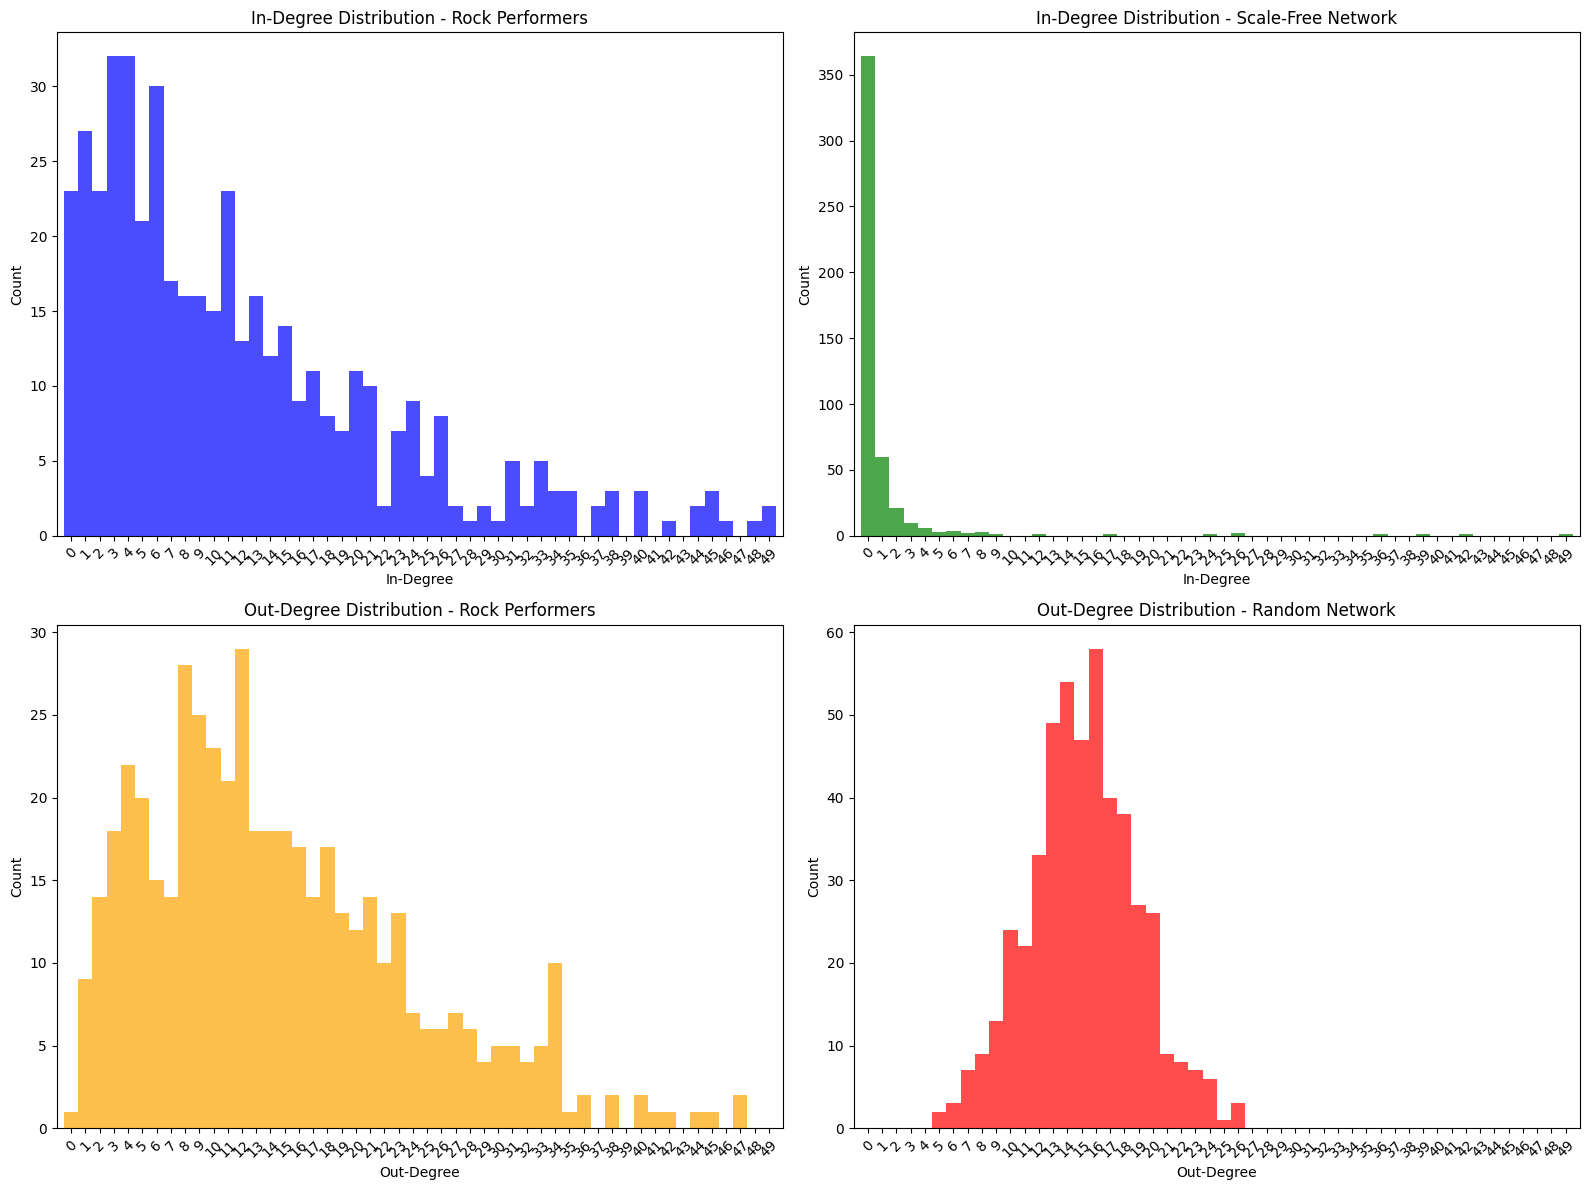

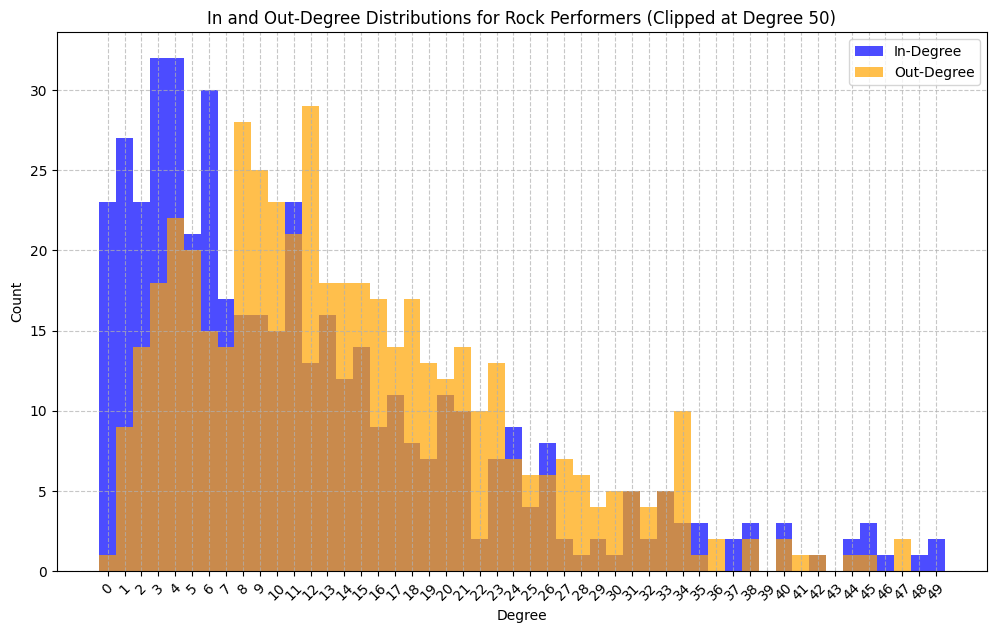


Top 5 performers by in-degree:
Led Zeppelin: 119
Bob Dylan: 95
Queen (band): 88
Metallica: 85
David Bowie: 84

Top 5 performers by out-degree:
Alice in Chains: 74
Deep Purple: 71
Black Sabbath: 60
Def Leppard: 52
Bryan Adams: 51

Top 10 performers by wiki page length:
Bob Dylan: 30647 words
Guns N' Roses: 29710 words
Paul McCartney: 27330 words
Queen (band): 27170 words
The Rolling Stones: 26186 words
David Bowie: 24912 words
Elton John: 24904 words
U2: 24877 words
The Beach Boys: 24816 words
Elvis Presley: 24710 words


In [11]:
# Exercise simple network statistics and anlysis
print(f"The network has {G_largest.number_of_nodes()} nodes and {G_largest.number_of_edges()} links")

random_network = nx.gnm_random_graph(G_largest.number_of_nodes(), G_largest.number_of_edges(), directed=True)
scale_free_network = nx.scale_free_graph(G_largest.number_of_nodes())

in_degree_graph = list(dict(G_largest.in_degree()).values())
out_degree_graph = list(dict(G_largest.out_degree()).values())
in_degree_scale_free = list(dict(scale_free_network.in_degree()).values())
out_degree_random = list(dict(random_network.out_degree()).values())

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.title("In-Degree Distribution - Rock Performers")
plt.hist(in_degree_graph, bins=np.arange(max(in_degree_graph)), color='blue', alpha=0.7, label='In-Degree', align='left')
plt.xlabel("In-Degree")
plt.ylabel("Count")
plt.xlim(-1, 50)
plt.xticks(np.arange(0, 50, step=1), rotation=45)

plt.subplot(2, 2, 2)
plt.title("In-Degree Distribution - Scale-Free Network")
plt.hist(in_degree_scale_free, bins=np.arange(max(in_degree_scale_free)), color='green', alpha=0.7, label='In-Degree', align='left')
plt.xlabel("In-Degree")
plt.ylabel("Count")
plt.xlim(-1, 50)
plt.xticks(np.arange(0, 50, step=1), rotation=45)

plt.subplot(2, 2, 3)
plt.title("Out-Degree Distribution - Rock Performers")
plt.hist(out_degree_graph, bins=np.arange(max(out_degree_graph)), color='orange', alpha=0.7, label='Out-Degree', align='left')
plt.xlabel("Out-Degree")
plt.ylabel("Count")
plt.xlim(-1, 50)
plt.xticks(np.arange(0, 50, step=1), rotation=45)

plt.subplot(2, 2, 4)
plt.title("Out-Degree Distribution - Random Network")
plt.hist(out_degree_random, bins=np.arange(max(out_degree_random)), color='red', alpha=0.7, label='Out-Degree', align='left')
plt.xlabel("Out-Degree")
plt.ylabel("Count")
plt.xlim(-1, 50)
plt.xticks(np.arange(0, 50, step=1), rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
plt.title("In and Out-Degree Distributions for Rock Performers (Clipped at Degree 50)")
plt.xlabel("Degree")
plt.ylabel("Count")
bins = np.arange(0, 51) 
plt.hist(in_degree_graph, bins=bins, color='blue', alpha=0.7, label='In-Degree', align='left')
plt.hist(out_degree_graph, bins=bins, color='orange', alpha=0.7, label='Out-Degree', align='left')
plt.xticks(np.arange(0, 50, step=1), rotation=45)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# top 5 nodes in-degree and out-degree
top_in_degree = sorted(G_largest.in_degree(), key=lambda x: x[1], reverse=True)[:5]
top_out_degree = sorted(G_largest.out_degree(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 performers by in-degree:")
for node, degree in top_in_degree:
    print(f"{node}: {degree}")

print("\nTop 5 performers by out-degree:")
for node, degree in top_out_degree:
    print(f"{node}: {degree}")

# top 10 pages with longest wiki entries
node_content_length = [(node, G_largest.nodes[node]['word_count']) for node in G_largest.nodes()]
top_content_length = sorted(node_content_length, key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 performers by wiki page length:")
for node, length in top_content_length:
    print(f"{node}: {length} words")

# Part 3: Visualizing the networks

*Exercise:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in the following exercises.
>2. Use the NetworkX command `nx.spring_layout` or `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithms here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Set up your plot so that node-size depends on the node *degree*.
>   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do almost everything yourself. But it's OK to use an LLM for help with the coloring.
</div>

If you want to make things more fancy, note that Wikipedia writes that local minima is a problem for these graphs: "It is easy to see that force-directed algorithms produce a graph with minimal energy, in particular one whose total energy is only a local minimum. The local minimum found can be, in many cases, considerably worse than a global minimum, which translates into a low-quality drawing. For many algorithms, especially the ones that allow only down-hill moves of the vertices, the final result can be strongly influenced by the initial layout, that in most cases is randomly generated. The problem of poor local minima becomes more important as the number of vertices of the graph increases. **A combined application of different algorithms is helpful to solve this problem**. For example, using the Kamada–Kawai algorithm to quickly generate a reasonable initial layout and then the Fruchterman–Reingold algorithm to improve the placement of neighbouring nodes." (my emphasis) 

But don't worry if your network looks like a hairball (a.k.a a *ridiculogram*) for now, we'll dig deeper with visualization next time.

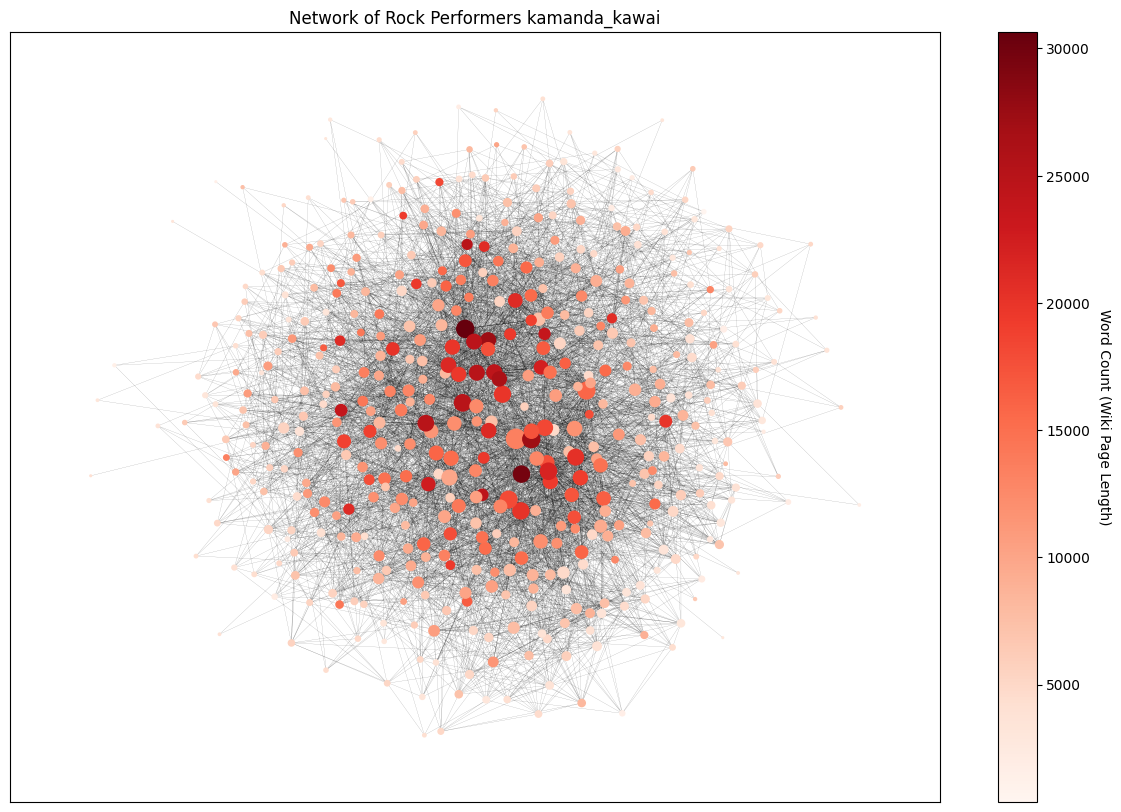

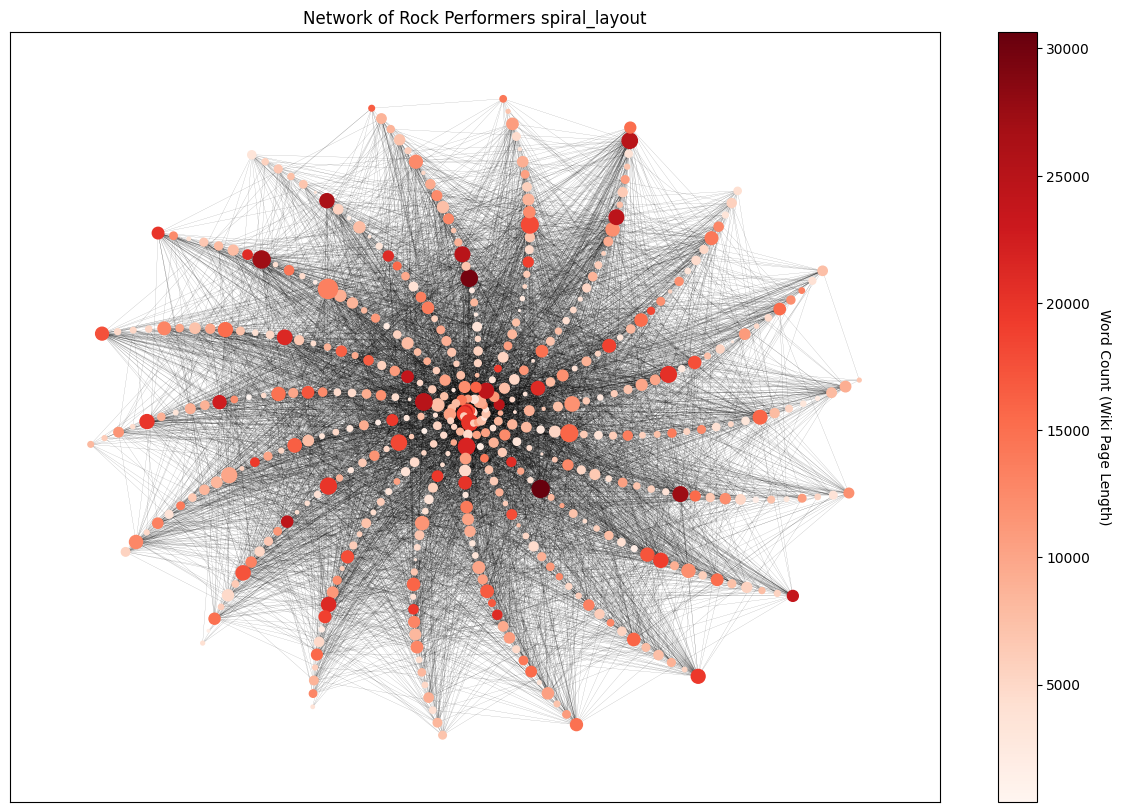

In [12]:
# Exercise let's build a simple visualization of the network
G_largest_undirected = G_largest.to_undirected()
nodes = list(G_largest_undirected.nodes())
degrees = [G_largest_undirected.degree(node) for node in nodes]
word_counts = [G_largest_undirected.nodes[node]['word_count'] for node in nodes]

# kamnada_kawai layout
plt.figure(figsize=(15, 10))
plt.title("Network of Rock Performers kamanda_kawai")
pos = nx.kamada_kawai_layout(G_largest_undirected)
nodes_drawn = nx.draw_networkx_nodes(G_largest_undirected, pos,
                                     nodelist=nodes,
                                     node_size=[d * 1.5 for d in degrees],
                                     node_color=word_counts,
                                     cmap=plt.cm.Reds)
nx.draw_networkx_edges(G_largest_undirected, pos, width=0.1, alpha=0.6)
cbar = plt.colorbar(nodes_drawn)
cbar.set_label('Word Count (Wiki Page Length)', rotation=270, labelpad=15)
plt.show()

# spiral layout
plt.figure(figsize=(15, 10))
plt.title("Network of Rock Performers spiral_layout")
pos = nx.spiral_layout(G_largest_undirected)
nodes_drawn = nx.draw_networkx_nodes(G_largest_undirected, pos,
                                     nodelist=nodes,
                                     node_size=[d * 1.5 for d in degrees],
                                     node_color=word_counts,
                                     cmap=plt.cm.Reds)
nx.draw_networkx_edges(G_largest_undirected, pos, width=0.1, alpha=0.6)
cbar = plt.colorbar(nodes_drawn)
cbar.set_label('Word Count (Wiki Page Length)', rotation=270, labelpad=15)
plt.show()